# Orbit 1 - Stephen Fegan - 2017-10-06

Copyright 2017, Stephen Fegan <sfegan@llr.in2p3.fr>  
LLR, Ecole polytechnique, CNRS/IN2P3, Universite Paris-Saclay  
This work is licensed under the CC AT-NC-SA 4.0 license - see LICENSE.md

Solve Newton's equations of motion under gravity in the solar system, to calculate the motion of the Earth around the Sun.

#### This example shows :

- The motion is in a plane
- with the X and Y positions and speeds changing (osciallating)
- but with the Z position and speed fixed at zero.
- In the case of the Earth the "orbit" (the shape the Earth's motion makes) is a circle,
- with constant distance from the Sun,
- and constant total speed.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
M_sun    = 1.9891e+30 # kg
M_earth  = 5.9742412e+24 # kg
year     = 365.242198781*24*60*60 # s
AU       = 1.4960772461550726e+11 # m
R_earth  = 6371010 # m
v_earth  = 2*pi*AU/year
G        = 6.67384e-11 # m^3 / kg s^2

In [3]:
(G*M_sun*year**2/4/pi**2)**(1/3)

149607724615.50726

In [4]:
M     = M_sun
r0    = 1*AU
v0    = v_earth
dt    = 60*60
t_sim = 4*year

In [5]:
t = 0
t_sample = -inf
x = asarray([r0,0,0])
v = asarray([0,v0,0])

all_t = []
all_x = []
all_v = []
all_a = []

while t<t_sim:
    r = norm(x)
    ux = x/r

    a = -G*M/r**2*ux
    v += a*dt
    x += v*dt
    t += dt

    all_a.append(a.copy())
    all_v.append(v.copy())
    all_x.append(x.copy())
    all_t.append(t)

all_t = asarray(all_t)
all_x = column_stack(all_x)
all_v = column_stack(all_v)
all_a = column_stack(all_a)

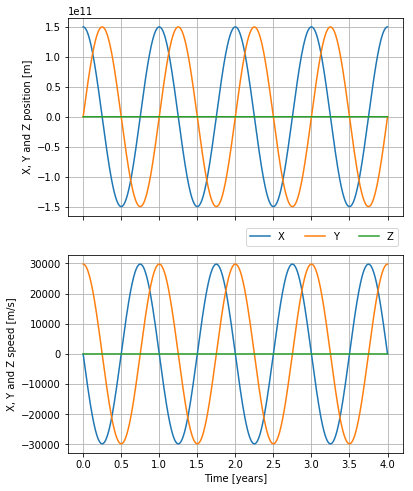

In [6]:
figure(figsize=(6,8))
subplot(2,1,1)
plot(asarray(all_t)/year, all_x[0,:], label='X')
plot(asarray(all_t)/year, all_x[1,:], label='Y')
plot(asarray(all_t)/year, all_x[2,:], label='Z')
ylabel('X, Y and Z position [m]')
gca().set_xticklabels([])
grid()
subplot(2,1,2)
plot(asarray(all_t)/year, all_v[0,:], label='X')
plot(asarray(all_t)/year, all_v[1,:], label='Y')
plot(asarray(all_t)/year, all_v[2,:], label='Z')
grid()
xlabel('Time [years]')
ylabel('X, Y and Z speed [m/s]')
legend(loc = 'right', ncol = 3, bbox_to_anchor = (0.9,0.5),
            bbox_transform = gcf().transFigure )
#tight_layout()


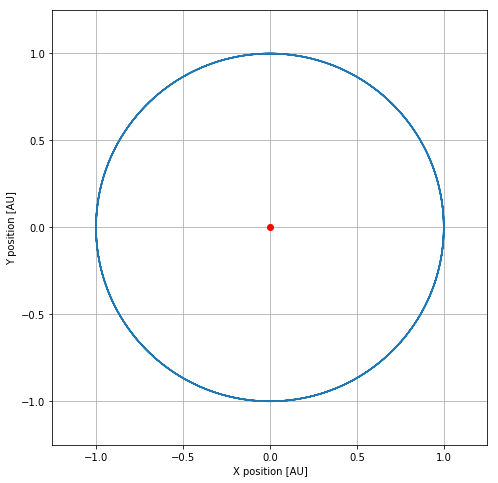

In [7]:
figure(figsize(8,8))
plot(all_x[0,:]/AU, all_x[1,:]/AU)
plot(0,0,'or')
axis('square')
axis(asarray([-1,1,-1,1])*max(norm(all_x, axis=0))/AU*1.25)
grid()
xlabel('X position [AU]')
ylabel('Y position [AU]')

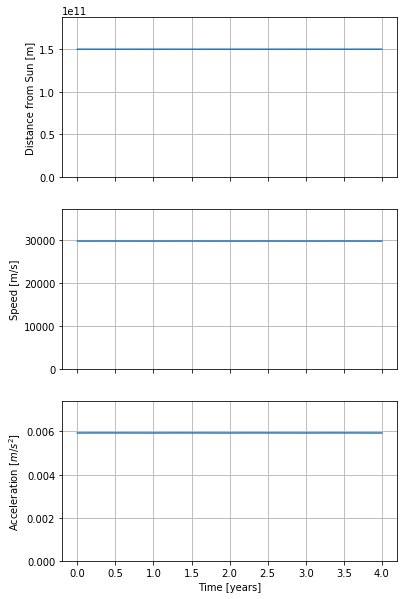

In [8]:
figure(figsize=(6,10))
subplot(3,1,1)
plot(asarray(all_t)/year, norm(all_x,axis=0))
ylabel('Distance from Sun [m]')
gca().set_xticklabels([])
a = list(axis())
a[2] = 0
a[3] = max(norm(all_x,axis=0))*1.25
axis(a)
grid()
subplot(3,1,2)
plot(asarray(all_t)/year, norm(all_v, axis=0))
a = list(axis())
a[2] = 0
a[3] = max(norm(all_v,axis=0))*1.25
axis(a)
grid()
gca().set_xticklabels([])
ylabel('Speed [m/s]')
subplot(3,1,3)
plot(asarray(all_t)/year, norm(all_a, axis=0))
a = list(axis())
a[2] = 0
a[3] = max(norm(all_a,axis=0))*1.25
axis(a)
grid()
xlabel('Time [years]')
ylabel('Acceleration [$m/s^2$]')